<a href="https://colab.research.google.com/github/arunv8055/Machine-Learning/blob/main/Face_Mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Mask detection

**Installing Kaggle library**

In [1]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# New Section

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing Facemask dataset**

In [3]:
# API to fetch Data From Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 90% 147M/163M [00:01<00:00, 134MB/s]
100% 163M/163M [00:01<00:00, 124MB/s]


In [33]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted successfully')

The dataset is extracted successfully


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


# Importing the *Libraries*


In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_file = os.listdir('/content/data/with_mask')
print(with_mask_file[0:10])
print(with_mask_file[-10])

['with_mask_1460.jpg', 'with_mask_1212.jpg', 'with_mask_3112.jpg', 'with_mask_3526.jpg', 'with_mask_498.jpg', 'with_mask_3506.jpg', 'with_mask_3379.jpg', 'with_mask_181.jpg', 'with_mask_1571.jpg', 'with_mask_3510.jpg']
with_mask_2283.jpg


In [8]:
without_mask_file = os.listdir('/content/data/without_mask')
print(without_mask_file[0:10])
print(without_mask_file[-10])

['without_mask_3637.jpg', 'without_mask_1213.jpg', 'without_mask_2409.jpg', 'without_mask_2869.jpg', 'without_mask_755.jpg', 'without_mask_2974.jpg', 'without_mask_3313.jpg', 'without_mask_1419.jpg', 'without_mask_3278.jpg', 'without_mask_1068.jpg']
without_mask_426.jpg


*Lenth of the files*

In [9]:
len(with_mask_file)

3725

In [10]:
len(without_mask_file)

3828

**Creating Lables for the two class on Images**

 1. With masK ==============> 1 (True)

 
 2. Without mask ===========> 0 (False)

In [11]:
# Create a lable

with_mask_lables = [1]*3725

without_mask_lables = [0]*3828

In [12]:
print(with_mask_lables [0:5])
print(without_mask_lables [0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
lables = with_mask_lables + without_mask_lables

In [14]:
len(lables)

7553

*Displaying the Images*

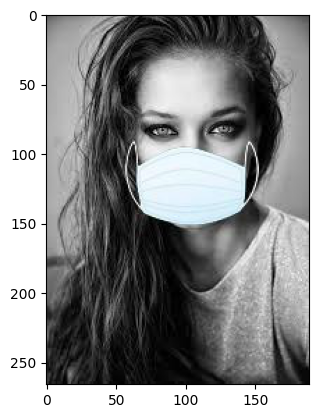

In [15]:
#image with mask
img = mpimg.imread('/content/data/with_mask/with_mask_1460.jpg')
imgplot = plt.imshow(img)
plt.show()


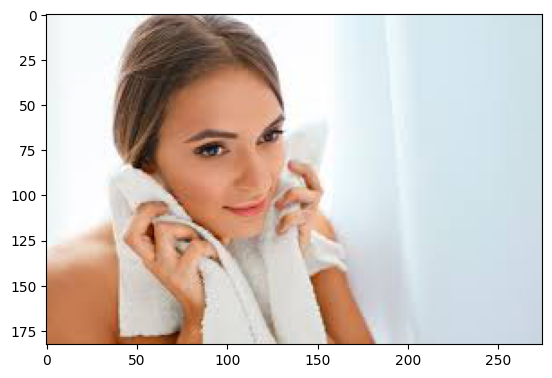

In [16]:
#image without mask
img = mpimg.imread('/content/data/without_mask/without_mask_3637.jpg')
imgplot = plt.imshow(img)
plt.show()

*Image Processing*

1. Resize
2. convert the images to numpy arrays

In [17]:
# convert the images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_file:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_file:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
type(data)

list

In [19]:
len(data)

7553

In [20]:
data[19]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 18,  18,  18],
        [ 15,  15,  15],
        [ 17,  17,  17],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 18,  18,  18],
        [ 14,  14,  14],
        [ 15,  15,  15],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 19,  19,  19],
        [ 17,  17,  17],
        [ 18,  18,  18],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [21]:
type(data[90])

numpy.ndarray

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
# converting image list and lables into numpy arrays

x = np.array(data)
y = np.array(lables)

In [24]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [25]:
print(y)

[1 1 1 ... 0 0 0]


# Train Test split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [27]:
print(x.shape, x_train.shape, x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [28]:
# scaling the data

x_train_scaled = x_train/255

x_test_scaled = x_test/255

In [29]:
x_train[0]

array([[[ 77,  86,  95],
        [ 76,  85,  94],
        [ 77,  85,  95],
        ...,
        [ 55,  55,  68],
        [ 55,  55,  67],
        [ 56,  56,  68]],

       [[ 76,  86,  96],
        [ 73,  82,  92],
        [ 72,  80,  90],
        ...,
        [ 55,  55,  67],
        [ 58,  58,  70],
        [ 59,  59,  71]],

       [[ 74,  84,  94],
        [ 72,  81,  92],
        [ 73,  81,  92],
        ...,
        [ 56,  56,  68],
        [ 59,  59,  71],
        [ 59,  59,  71]],

       ...,

       [[235, 244, 223],
        [235, 244, 223],
        [234, 242, 223],
        ...,
        [207, 210, 193],
        [207, 210, 193],
        [208, 212, 195]],

       [[237, 244, 223],
        [236, 242, 221],
        [239, 244, 224],
        ...,
        [206, 210, 193],
        [210, 214, 197],
        [211, 215, 198]],

       [[238, 241, 222],
        [241, 244, 225],
        [240, 243, 224],
        ...,
        [207, 211, 194],
        [212, 216, 199],
        [206, 210, 193]]

In [30]:
x_train_scaled[0]

array([[[0.30196078, 0.3372549 , 0.37254902],
        [0.29803922, 0.33333333, 0.36862745],
        [0.30196078, 0.33333333, 0.37254902],
        ...,
        [0.21568627, 0.21568627, 0.26666667],
        [0.21568627, 0.21568627, 0.2627451 ],
        [0.21960784, 0.21960784, 0.26666667]],

       [[0.29803922, 0.3372549 , 0.37647059],
        [0.28627451, 0.32156863, 0.36078431],
        [0.28235294, 0.31372549, 0.35294118],
        ...,
        [0.21568627, 0.21568627, 0.2627451 ],
        [0.22745098, 0.22745098, 0.2745098 ],
        [0.23137255, 0.23137255, 0.27843137]],

       [[0.29019608, 0.32941176, 0.36862745],
        [0.28235294, 0.31764706, 0.36078431],
        [0.28627451, 0.31764706, 0.36078431],
        ...,
        [0.21960784, 0.21960784, 0.26666667],
        [0.23137255, 0.23137255, 0.27843137],
        [0.23137255, 0.23137255, 0.27843137]],

       ...,

       [[0.92156863, 0.95686275, 0.8745098 ],
        [0.92156863, 0.95686275, 0.8745098 ],
        [0.91764706, 0

**Building a convolutional Neural Network**

In [31]:
import tensorflow as tf
from tensorflow import keras

In [34]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))